In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import defaultdict
from collections import Counter
from itertools import combinations
from nltk.sentiment.vader import SentimentIntensityAnalyzer

df = pd.read_csv(r"C:\Users\ASUS\Downloads\archive (1)\movies.csv")



<table>
    <thead>
        <tr>
            <th>اسم العمود</th>
            <th>الشرح</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>id</td>
            <td>رقم تعريفي فريد لكل فيلم</td>
        </tr>
        <tr>
            <td>title</td>
            <td>اسم الفيلم</td>
        </tr>
        <tr>
            <td>genres</td>
            <td>تصنيفات الفيلم مفصولة بـ (-) مثل: Action - Science Fiction - Horror</td>
        </tr>
        <tr>
            <td>original_language</td>
            <td>اللغة الأصلية للفيلم </td>
        </tr>
        <tr>
            <td>overview</td>
            <td>ملخص أو وصف مختصر للفيلم</td>
        </tr>
        <tr>
            <td>popularity</td>
            <td>مقياس شهرة الفيلم (قيمة عددية مشتقة من نشاط البحث أو المشاهدة)</td>
        </tr>
        <tr>
            <td>production_companies</td>
            <td>أسماء شركات الإنتاج المشاركة، مفصولة بـ (-)</td>
        </tr>
        <tr>
            <td>release_date</td>
            <td>تاريخ إصدار الفيلم</td>
        </tr>
        <tr>
            <td>budget</td>
            <td>ميزانية الفيلم بالدولار الأمريكي</td>
        </tr>
        <tr>
            <td>revenue</td>
            <td>إجمالي الإيرادات التي حققها الفيلم بالدولار الأمريكي</td>
        </tr>
        <tr>
            <td>runtime</td>
            <td>مدة عرض الفيلم بالدقائق</td>
        </tr>
        <tr>
            <td>status</td>
            <td>حالة الفيلم مثل: Released - Post Production - ..</td>
        </tr>
        <tr>
            <td>tagline</td>
            <td>شعار تسويقي للفيلم </td>
        </tr>
        <tr>
            <td>vote_average</td>
            <td>متوسط تقييم الفيلم من قبل المستخدمين</td>
        </tr>
        <tr>
            <td>vote_count</td>
            <td>عدد الأشخاص الذين قاموا بتقييم الفيلم</td>
        </tr>
        <tr>
            <td>credits</td>
            <td>قائمة الممثلين والطاقم، مفصولة بـ (-)</td>
        </tr>
        <tr>
            <td>keywords</td>
            <td>كلمات مفتاحية مرتبطة بمحتوى الفيلم، مفصولة بـ (-)</td>
        </tr>
        <tr>
            <td>poster_path</td>
            <td>مسار صورة ملصق الفيلم</td>
        </tr>
        <tr>
            <td>backdrop_path</td>
            <td>مسار صورة خلفية الفيلمي</td>
        </tr>
        <tr>
            <td>recommendations</td>
            <td>قائمة بمعرّفات أفلام أخرى مقترحة، مفصولة بـ (-)</td>
        </tr>
    </tbody>
</table>



### preprocessing:

يوجد في البيانات أفلام بلغات عديدة، منها التركية، اليابانية، الهندية، والإنجليزية، حيث تحتوي قاعدة البيانات على أفلام بـ **167 لغة مختلفة**.

لكن، في دراستنا سنقتصر على الأفلام باللغة الإنجليزية فقط، وذلك لضمان دقة وتحليل أكثر عمقًا وموضوعية.



In [2]:

num_languages = df['original_language'].nunique()
print(f"عدد اللغات الأصلية المختلفة هو: {num_languages}")
languages = df['original_language'].unique()
print(languages)


عدد اللغات الأصلية المختلفة هو: 167
['en' 'la' 'ko' 'es' 'no' 'cn' 'ja' 'hi' 'fi' 'ru' 'uk' 'nl' 'it' 'zh'
 'bn' 'th' 'id' 'is' 'da' 'fr' 'pl' 'te' 'pt' 'de' 'ro' 'tl' 'ta' 'ar'
 'el' 'sr' 'sv' 'gl' 'tr' 'vi' 'ml' 'lv' 'cs' 'bs' 'fa' 'ga' 'mk' 'pa'
 'eu' 'kn' 'ca' 'xx' 'sh' 'et' 'km' 'gu' 'he' 'hu' 'hr' 'dz' 'ne' 'ka'
 'ms' 'mn' 'kk' 'si' 'af' 'sl' 'bo' 'sk' 'wo' 'hy' 'se' 'sq' 'kl' 'su'
 'ku' 'eo' 'ur' 'sw' 'mi' 'cy' 'as' 'lt' 'ps' 'mr' 'qu' 'bm' 'rw' 'ay'
 'uz' 'bg' 'am' 'lo' 'iu' 'zu' 'os' 'xh' 'ak' 'yi' 'mt' 'yo' 'my' 'ff'
 'nb' 'st' 'jv' 'ha' 'gn' 'lb' 'az' 'ky' 'gd' 'or' 'mo' 'ln' 'fo' 'tg'
 'tw' 'be' 'sa' 'ug' 'sm' 'an' 'ie' 'rm' 'co' 'nn' 'ti' 'ab' 'fy' 'tk'
 'so' 'lg' 'ht' 'ba' 'mg' 'ks' 'ss' 'dv' 'tt' 'ia' 'cr' 'ny' 'ig' 'ce'
 'bi' 'ii' 'sn' 'nv' 'mh' 'sg' 'ki' 'za' 'oj' 'to' 'ts' 'om' 'kg' 'rn'
 'sd' 'oc' 'kw' 'pi' 'gv' 'av' 'tn' 'cv' 'fj' 'sc' 'ty' 'ch' 'li']


In [3]:
english_movies = df[df['original_language'] == 'en']

حذف الاعمدة التي لن نتطرق لها اثناء تحليل ودراسة : 


In [4]:

english_movies = english_movies.drop(columns=['keywords', 'poster_path', 'backdrop_path','recommendations' ])

نلاحظ وجود عدد كبير من القيم الفارغة في العديد من الأعمدة، حيث أن نسبة القيم المفقودة في بعض الأعمدة تتجاوز **80%**، مما يجعل أي محاولة للتعويض باستخدام تقنيات مثل التقدير أو التنبؤ غير دقيقة، وقد تؤدي إلى نتائج خاطئة    
بالإضافة إلى ذلك، هناك نقص كبير في أعمدة مهمة وأساسية مثل:

- أسماء الممثلين
- تاريخ العرض
- مدة العرض
- نوع الفيلم

لذلك، أي تحليل يعتمد على هذه الأعمدة سيكون غير دقيق

In [5]:
english_movies.isna().sum()

id                           0
title                        6
genres                  129102
original_language            0
overview                  7973
popularity                   0
production_companies    216986
release_date             35214
budget                       0
revenue                      0
runtime                  14064
status                       0
tagline                 292882
vote_average                 0
vote_count                   0
credits                 134654
dtype: int64


1. **حذف جميع الصفوف التي تحتوي على قيم فارغة**  
   بسبب النسبة العالية جدا للقيم المفقودة في أعمدة حساسة، قمنا بحذف هذه الصفوف بالكامل لضمان الاعتماد فقط على بيانات مكتملة.

2. **حذف الصفوف المكررة بشكل كامل مع الاحتفاظ بأول تكرار**  
   هذه الخطوة تضمن عدم وجود نسخ مكررة تماماً من نفس الفيلم.

3. **حذف التكرار بناءً على عنوان الفيلم وتاريخ عرضه فقط**   
   بعض الأفلام قد تُسجل أكثر من مرة بنفس العنوان وتاريخ الإصدار، لذا تم حذف التكرار بناءً على هذين العمودين فقط.
### النتيجة:
عدد الأفلام المتبقية بعد حذف:  
48654


In [6]:
english_movies = english_movies.dropna()
english_movies = english_movies.drop_duplicates(keep='first')
english_movies= english_movies.drop_duplicates(subset=['title', 'release_date'])
len(english_movies)

48654

### شرح حالات حالة الأفلام (status)
- **Released (تم الإصدار):**  
  الأفلام التي تم الانتهاء منها وتم إصدارها رسميًا للجمهور.  
  عددها: 48,620 فيلم  
  تمثل أغلب الأفلام في البيانات.

- **In Production (قيد الإنتاج):**  
  الأفلام التي ما زالت في مرحلة التصوير والإنتاج الفعلي.  
  عددها: 19 فيلم  
  لم تُكمل بعد مراحل الإنتاج.

- **Post Production (ما بعد الإنتاج):**  
  الأفلام التي انتهى تصويرها وجاري العمل على المونتاج، المؤثرات، والمراحل النهائية قبل الإصدار.  
  عددها: 12 فيلم

- **Planned (مخطط لها):**  
  الأفلام التي في مرحلة التخطيط فقط، ولم يبدأ تصويرها أو إنتاجها بعد.  
  عددها: 3 أفلام
واخيرا :
 البيانات غير متوازنة , يعني الموديل ما رح يتعلم شي فعلي عن الفئات النادرة لأنها:
قليلة لدرجة ما تمثل نمط واضح.
لذلك سيتم الاحتفاظ فقط بحالة صدرو الفيلم

In [7]:
unique_status_count = english_movies['status'].nunique()
print(unique_status_count)
print(english_movies['status'].value_counts())

4
status
Released           48620
In Production         19
Post Production       12
Planned                3
Name: count, dtype: int64


In [8]:

english_movies = english_movies[english_movies['status'] == 'Released']



### حذف افلام يلي مدتها صفر: وهي تم اطلاقها ف هون في غلط بالبيانات كادخال ف يفضل الحذف

In [9]:
english_movies_zero_runtime = english_movies[english_movies['runtime'] == 0]
print(english_movies_zero_runtime['status'].value_counts())
english_movies = english_movies[english_movies['runtime'] > 0]


status
Released    793
Name: count, dtype: int64



- في **Outliers**  :
  - أقصر فيلم: **1 دقيقة فقط**
  - أطول فيلم: **960 دقيقة** (يعني 16 ساعة تقريبًا!)
- المتوسط العام: **86 دقيقة**
- أغلب الأفلام تقع بين:
  - **الربع الأول (25%)** = 75 دقيقة
  - **الربع الثالث (75%)** = 100 دقيقة

: لازم نحذف القيم المتطرفة
- نحصر البيانات  بين:
  - 15 دقيقة كحد أدنى (منطقي لفيلم قصير)
  - 400 دقيقة كحد أقصى (3 ساعات كحد مقبول للأفلام الطويلة)

In [10]:
english_movies['runtime'].describe()


count    47827.000000
mean        86.207289
std         34.644593
min          1.000000
25%         75.000000
50%         90.000000
75%        100.000000
max        960.000000
Name: runtime, dtype: float64

In [11]:

one_minute = english_movies[english_movies['runtime'] < 15]
print(f"عدد الأفلام مدتها 15 دقيقة: {len(one_minute)}")

over_400 = english_movies[english_movies['runtime'] > 400]
print(f"عدد الأفلام مدتها أكثر من 400 دقيقة: {len(over_400)}")

عدد الأفلام مدتها 15 دقيقة: 2356
عدد الأفلام مدتها أكثر من 400 دقيقة: 29


### قبل الحذف بدي شوف ازا بينتمو لنوع محدد بس لا لذلك تم حذف 

In [12]:

one_minute_genres = english_movies[english_movies['runtime'] <15]['genres'].unique()
print(f"عدد الأنواع الفريدة لأفلام مدتها دقيقة واحدة: {len(one_minute_genres)}")
print(one_minute_genres)

over_400_genres = english_movies[english_movies['runtime'] > 400]['genres'].unique()
print(f"عدد الأنواع الفريدة لأفلام مدتها أكثر من 400 دقيقة: {len(over_400_genres)}")
print(over_400_genres)


عدد الأنواع الفريدة لأفلام مدتها دقيقة واحدة: 498
['Action-Science Fiction' 'Family-Animation-Comedy'
 'Animation-Family-Comedy-Fantasy' 'Animation-Comedy-Fantasy'
 'Animation-Comedy-Family-Fantasy'
 'Animation-Adventure-Comedy-Family-Science Fiction' 'Comedy'
 'Science Fiction-Fantasy' 'Action-Comedy-Fantasy-Thriller'
 'Drama-Western-Adventure' 'Family-Fantasy-Animation-Comedy'
 'Horror-Mystery' 'Animation-Family-Comedy' 'Animation-Family'
 'Animation-Horror' 'Science Fiction-Thriller' 'Horror'
 'Science Fiction-Action-Fantasy' 'Documentary-War'
 'Science Fiction-Comedy-Fantasy' 'Animation-Fantasy-Comedy' 'Documentary'
 'Horror-Comedy' 'Horror-Science Fiction-Thriller' 'Mystery-Horror'
 'Drama' 'Drama-Fantasy' 'Drama-Crime-Action' 'Mystery-Thriller'
 'Thriller-Horror' 'Adventure-Action-Fantasy' 'Family-Comedy-Animation'
 'Action-Adventure-Science Fiction' 'Fantasy-Comedy'
 'Animation-Family-Romance' 'Science Fiction-Drama'
 'Music-Animation-Comedy-Family' 'Animation-Comedy-Drama-Famil

In [13]:

english_movies = english_movies[(english_movies['runtime'] > 15) & (english_movies['runtime'] < 400)]

print(english_movies['runtime'].describe())

count    45212.000000
mean        90.341303
std         27.374215
min         16.000000
25%         79.000000
50%         90.000000
75%        101.000000
max        390.000000
Name: runtime, dtype: float64



 معظم الأفلام شعبيتها منخفضة:
- 25% من الأفلام أقل من **1.33**
- 50% من الأفلام أقل من **2.80** (الوسيط)
- 75% من الأفلام أقل من **7.88**

 توجد قيم شاذة جدًا (Outliers):
- القيمة القصوى **8763.99** بعيدة جدًا عن المتوسط.
- الانحراف المعياري المرتفع **89.67** يدل على وجود تشتت كبير في القيم.

### الاستنتاج:
لا يمكن الاعتماد على هذا العامود كمؤشر دقيق لقياس شهرة الفيلم، للأسباب التالية:
- وجود تفاوت كبير بين القيم.
- القيم المتطرفة تؤثر على التحليل الإحصائي.
**يُفضل استخدام مؤشرات بديلة أكثر دقة لقياس شهرة الأفلام.**


In [14]:

print(english_movies['popularity'].describe())


count    45212.000000
mean        10.236429
std         89.685811
min          0.001000
25%          1.333000
50%          2.807000
75%          7.885000
max       8763.998000
Name: popularity, dtype: float64


### نتيجة:

- عدد التقييمات غير متوزع بشكل جيد، حيث معظم الأفلام حصلت على عدد قليل جدًا من التقييمات، وهذا يجعل الاعتماد على المتوسط غير موثوق.

- متوسط التقييم قد يعطي مؤشرًا أوليًا لجودة الفيلم، لكنه لا يعكس الحقيقة بشكل كامل خاصةً إذا كان عدد التقييمات قليل جدًا.

- بالتالي، لا يمكن الاعتماد على عدد التقييمات أو متوسط التقييم لوحدهما كمعيار دقيق لتحليل جودة أو شهرة الأفلام.



In [15]:
print(english_movies['vote_count'].describe())
print(english_movies['vote_average'].describe())



count    45212.000000
mean       352.231509
std       1507.039860
min          0.000000
25%          1.000000
50%         10.000000
75%         77.000000
max      34857.000000
Name: vote_count, dtype: float64
count    45212.000000
mean         4.843025
std          2.602260
min          0.000000
25%          4.000000
50%          5.700000
75%          6.548250
max         10.000000
Name: vote_average, dtype: float64



## استخدام تحليل المشاعر لجملة الترويج كميزة جديدة 
## tagline_sentiment

في هالخطوة، عملنا تحليل مشاعر لجمل الترويج  لكل فيلم, انشئنا عامود جديد  بيحدد إذا كانت جملة الترويج إيجابية، سلبية أو محايدة.

الهدف من هالميزة هو تزويد نموذج تعلم الآلة بمعلومة إضافية تساعده يفهم مشاعر الجملة الترويجية للفيلم، لأنه ممكن تكون مؤشر مهم  على إيرادات الفيلم.

مثلاً:

جملة ترويجية إيجابية ممكن تعزز اهتمام المشاهدين وبالتالي تزيد الإيرادات.

جملة ترويجية سلبية أو محايدة قد تعكس حالة مختلفة.

باستخدام هالميزة، نموذج التنبؤ ممكن يصير أكثر دقة في توقع إيرادات الأفلام.

In [52]:


sid = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    if not isinstance(text, str):  
        return 'neutral'
    scores = sid.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 1
    elif compound <= -0.05:
        return -1
    else:
        return 0

english_movies['tagline_sentiment'] = english_movies['tagline'].apply(analyze_sentiment)


print(english_movies[['tagline', 'tagline_sentiment']].head())


sentiment_counts = english_movies['tagline_sentiment'].value_counts()
print(sentiment_counts)


                                             tagline  tagline_sentiment
0                                  Back for seconds.                  0
1  Inspired by the actual files of Father Gabriel...                  1
2                                     Come together.                  0
3                                     Unite or fall.                  0
4                            Long live the fighters.                 -1
tagline_sentiment
 0    16571
 1    16060
-1    12581
Name: count, dtype: int64


### إنشاء ميزة جديدة: الأرباح (profit)

تم إنشاء ميزة جديدة تُسمى **الأرباح**، والتي تمثل الفرق بين إيرادات الفيلم  والتكلفة أو الميزانية التي صرفت عليه .

بالتالي، تُعطينا هذه الميزة فكرة واضحة عن نجاح الفيلم من الناحية المالية، حيث نعرف هل الفيلم حقق أرباحًا أو خسر مبلغًا معينًا.

هذه الميزة مهمة لأنها   توفر لنا مؤشرًا أدق على الأداء المالي للفيلم.


In [16]:
english_movies['profit'] = english_movies['revenue'] - english_movies['budget']

In [17]:

english_movies['release_date'] = pd.to_datetime(english_movies['release_date'], errors='coerce')
english_movies['release_year'] = english_movies['release_date'].dt.year
english_movies['release_month'] = english_movies['release_date'].dt.month
english_movies['release_day'] =english_movies['release_date'].dt.day


In [18]:

english_movies['release_year'] = english_movies['release_date'].dt.year
valid_years = english_movies['release_year'].dropna()
unique_years = valid_years.unique()
print(f"عدد السنوات الفريدة: {len(unique_years)}")
min_year = valid_years.min()
max_year = valid_years.max()
print(f"أصغر سنة في البيانات: {min_year}")
print(f"أكبر سنة في البيانات: {max_year}")
print("السنوات الفريدة مرتبة:")
print(sorted(unique_years))


عدد السنوات الفريدة: 118
أصغر سنة في البيانات: 1906
أكبر سنة في البيانات: 2025
السنوات الفريدة مرتبة:
[np.int32(1906), np.int32(1907), np.int32(1910), np.int32(1911), np.int32(1912), np.int32(1913), np.int32(1914), np.int32(1915), np.int32(1916), np.int32(1917), np.int32(1918), np.int32(1919), np.int32(1920), np.int32(1921), np.int32(1922), np.int32(1923), np.int32(1924), np.int32(1925), np.int32(1926), np.int32(1927), np.int32(1928), np.int32(1929), np.int32(1930), np.int32(1931), np.int32(1932), np.int32(1933), np.int32(1934), np.int32(1935), np.int32(1936), np.int32(1937), np.int32(1938), np.int32(1939), np.int32(1940), np.int32(1941), np.int32(1942), np.int32(1943), np.int32(1944), np.int32(1945), np.int32(1946), np.int32(1947), np.int32(1948), np.int32(1949), np.int32(1950), np.int32(1951), np.int32(1952), np.int32(1953), np.int32(1954), np.int32(1955), np.int32(1956), np.int32(1957), np.int32(1958), np.int32(1959), np.int32(1960), np.int32(1961), np.int32(1962), np.int32(1963), n

## انشاء ميزة عدد ممثلين

In [19]:

english_movies['unique_actors_count'] = english_movies['credits'].apply(lambda x: len(set(str(x).split('-'))))


# تحليل الاتجاه العام لإنتاج الأفلام عبر السنوات

## الاتجاه العام:
يوجد **اتجاه تصاعدي واضح** على المدى الطويل، خاصة بعد التسعينات.

بداية من عام 2000، نلاحظ قفزات سريعة في عدد الأفلام المنتجة، وهذا مرتبط غالبا بـ:
- تطور التكنولوجيا .
- انتشار محطات ..
- من عام **1900 إلى 1950** كان النمو تدريجي وبطيء، وهو أمر منطقي بسبب بدايات صناعة السينما.
-    بين **1940 - 1980**،  نلاحظ انخفاضاً مرتبطاً بالحرب العالمية.
- مع نهاية التسعينات وبداية الألفية الجديدة، حدثت **طفرة في الإنتاج** السينمائي.
- بعد عام **2020**، نلاحظ انخفاضاً حاداً في عدد الأفلام المنتجة، وغالباً يعود ذلك إلى:
  - تأثير جائحة كورونا على الإنتاج السينمائي.
  - تأجيل أو إلغاء مواعيد إطلاق العديد من الأفلام.
  - بيانات السنوات الأخيرة قد تكون غير مكتملة أو لم تُسجل بعد بشكل دقيق.


In [20]:

year_counts = english_movies['release_year'].value_counts().reset_index()
year_counts.columns = ['release_year', 'count']
year_counts = year_counts.sort_values('release_year')
fig = px.scatter(year_counts, x='release_year', y='count', trendline='ols',
                 labels={'release_year': 'سنة الإصدار', 'count': 'عدد الأفلام'},
                 title='الاتجاه العام لإنتاج الأفلام عبر السنوات',
                 height=500)
fig.show()


### شرح  لعدد الأفلام حسب الأشهر

- **شهر 1 (يناير)** هو الشهر اللي فيه  عدد أفلام (4611)، وهذا غالبًا بسبب **احتفالات رأس السنة** وزيادة الإنتاج والعروض الجديدة في بداية السنة.

- **شهر 2 (فبراير)** شهد انخفاض كبير  مقارنة بشهر يناير.

- من **شهر 3 إلى شهر 9**، الأعداد تتراوح بين 3000 و 4200 مع تقلبات متوسطة في الإنتاج.

- في **شهر 10 (أكتوبر)**
 عدد الأفلام وصل لذروته الثانية (4825)، وهذا  يفسر بزيادة الأفلام المرتبطة بـ**احتفالات الهالوين** 
- في الأشهر الأخيرة (11 و12)  معدل متوسط الى عالي لاقتراب الميلاد وراس سنة .

نتيجة شهر 1 و10 ذروة الافلام .


In [21]:

monthly_counts = english_movies.groupby('release_month').size().reset_index(name='movie_count')
monthly_counts = monthly_counts.sort_values('release_month').reset_index(drop=True)

fig = px.bar(monthly_counts, x='release_month', y='movie_count',
             labels={'release_month': 'الشهر', 'movie_count': 'عدد الأفلام'},
             title='عدد الأفلام حسب الشهر عبر جميع السنوات',
             height=500)

fig.show()




##  توزيع الإنتاج غير متوازن:
- تركيز كبير على:
  - **الدراما** 
  - **الكوميديا**
  - **الأفلام الوثائقية**

- باقي الأنواع إنتاجها محدود، 
  

In [22]:
print(english_movies['genres'].value_counts().count())

genre_counts = english_movies['genres'].value_counts()
top_genres = genre_counts.head(50)
df_top_genres = top_genres.reset_index()
df_top_genres.columns = ['Genre', 'Count']
fig = px.bar(df_top_genres, x='Genre', y='Count',
             title='Top 50 Most Common Movie Genres',
             labels={'Genre': 'Genre', 'Count': 'Number of Movies'},
             height=500)

fig.update_layout(xaxis_tickangle=-45)

fig.show()


4478


###  التعامل مع الأنواع الفريدة في بيانات الأفلام

في بياناتي، يوجد حوالي **3884 فيلم** بأنواع **فريدة** تظهر مرة واحدة فقط من أصل **45,000 فيلم**. هذه الأنواع قد تؤثر على أداء نموذج .

لذلك، سأقوم بتجربة طريقتين:

1. **حذف الأنواع الفريدة**  
   - لتقليل التشويش والضوضاء في البيانات.  
   - تبسيط تصنيفات الأنواع مما قد يحسن من أداء النموذج.

2. **الاحتفاظ بالأنواع**  
   - للحفاظ على التنوع الكامل في البيانات.  
   - لمساعدة النموذج على التعامل مع الأنواع النادرة أو غير الشائعة.

سأقوم بمقارنة أداء النموذج في الحالتين لاختيار الأفضل.


In [23]:
genre_counts = english_movies['genres'].value_counts()
rare_genres = genre_counts[genre_counts < 3].index
# رح احتفظ بافلام يلي نوعها فريد لدراستها لاحقا  
english_moviesn = english_movies[english_movies['genres'].isin(rare_genres)]

# english_movies2 : الداتا بدون تشويش بالانواع
# مشان جرب تدريب علها
english_movies2 = english_movies[~english_movies['genres'].isin(rare_genres)]

len(english_movies2)

41399

### دراسة الانواع التي تحتوي على اكثر من 300 فيلم :
### 1. أعلى الأنواع ربحًا صافيًا:
| النوع                | الميزانية  | الربح الصافي  | ملاحظات                                                      |
| -------------------- | ------------ | --------------- | ------------------------------------------------------------------- |
| Action-Thriller      | 9.57 مليون   | 11.52 مليون     | رغم التكلفة العالية، النوع يحقق أرباح ضخمة، مناسب للاستثمار الكبير. |
| Comedy-Romance       | 5.37 مليون   | 11.70 مليون     | ربح ممتاز مقارنة بالتكلفة، النوع مربح للغاية   .       |
| Comedy-Drama-Romance | 5.29 مليون   | 11.59 مليون     | يثبت قوة الدمج بين الكوميديا والدراما والرومانسية في جذب الجماهير.  |
| Action-Drama         | 2.50 مليون   | 7.14 مليون      | استثمار متوسط بأرباح عالية، النوع يجمع الحماس مع الدراما بفعالية.   |
| Romance-Comedy       | 2.70 مليون   | 8.16 مليون      | نوع جماهيري مربح، دمج الرومانسية والكوميديا يجذب شريحة واسعة.       |

### 2. أنواع تحقق أرباح معتدلة وجيدة:
| النوع                  | الميزانية  | الربح الصافي  | ملاحظات                                                 |
| ---------------------- | ------------ | --------------- | -------------------------------------------------------------- |
| Drama-Romance          | 3.39 مليون   | 7.02 مليون      | أرباح مستقرة مع تكلفة متوسطة، النوع رومانسي درامي ناجح ماليًا. |
| Crime-Drama-Thriller   | 5.07 مليون   | 6.68 مليون      | مزيج الجريمة والإثارة يثبت فعاليته بتحقيق أرباح قوية.          |
| Comedy                 | 2.33 مليون   | 4.13 مليون      | الكوميديا تظل خيارًا مربحًا بأرباح متوسطة.                     |
| Drama-Crime            | 2.31 مليون   | 4.79 مليون      | دمج الدراما والجريمة يحقق نتائج مالية جيدة.                    |
| Horror-Thriller        | 1.89 مليون   | 5.17 مليون      | الرعب مع الإثارة يحقق أرباح عالية بتكاليف معقولة.              |
| Drama-Comedy           | 2.47 مليون   | 3.40 مليون      | أرباح جيدة، خليط بين الجدية والطرافة.                          |
| Horror-Science Fiction | 1.02 مليون   | 1.42 مليون      | أرباح معقولة، يجذب جمهور الخيال والرعب.                        |
| Thriller-Horror        | 902 ألف      | 2.18 مليون      | دمج الرعب مع التشويق ناجح ماليًا، مناسب للميزانيات الصغيرة.    |
| Drama-Thriller         | 2.93 مليون   | 1.93 مليون      | أرباح معقولة، لكنه أقل جذبًا من أنواع الإثارة الأخرى.          |
| Horror                 | 558 ألف      | 1.26 مليون      | نوع مربح جدًا مقارنة بالتكلفة المنخفضة.                        |
| Documentary-Music      | 153 ألف      | 339 ألف         | أرباح محدودة لكن إيجابية مقابل تكلفة منخفضة.                   |
| Documentary            | 71 ألف       | 260 ألف         | أرباح جيدة جدًا بميزانية شبه معدومة، النوع منخفض المخاطر.      |
| Thriller               | 1.04 مليون   | 597 ألف         | أرباح متوسطة، مناسب للمشاريع ذات المخاطرة المحدودة.            |
| Crime-Drama            | 1.46 مليون   | 816 ألف         | أرباح معقولة ضمن إطار الجريمة والدراما التقليدي.               |
| Comedy-Horror          | 795 ألف      | 1.04 مليون      | نوع منخفض التكلفة، يحقق أرباح بسيطة لكنها إيجابية.             |
| Western                | 202 ألف      | 150 ألف         | أرباح محدودة جدًا، سوق هذا النوع صغير وضعيف حاليًا.            |

### 3. أنواع كانت خاسرة أو ذات أداء ضعيف:
| النوع           | الميزانية  | الربح الصافي  | ملاحظات تحليلية                                                 |
| --------------- | ------------ | --------------- | --------------------------------------------------------------- |
| Action          | 1.62 مليون   | -145 ألف        | خسارة، رغم قوة نوع الأكشن، مشاريع هذا القسم لم تكن ناجحة.       |
| Music           | 67 ألف       | -19 ألف         | سوق الموسيقى ضعيف ماليًا، حتى مع ميزانية ضئيلة كانت هناك خسارة. |
| Science Fiction | 1.39 مليون   | -31 ألف         | خسارة طفيفة، ضعف نوع الخيال العلمي رغم شهرته   .     |


### استنتاج شامل:
 أفضل الأنواع ربحًا هي تلك التي تجمع بين الأكشن والإثارة، الكوميديا مع الرومانسية، أو الدراما مع عناصر أخرى مثل الإثارة أو الجريمة.
الأنواع المنخفضة الميزانية مثل الرعب والوثائقي تحقق أرباحًا جيدة جدًا مقابل تكلفتها.
 الأنواع الخاسرة تركزت في الأكشن  والموسيقى، والخيال العلمي، ما يدل على ضرورة التدقيق في اختيار المشاريع ضمن هذه الفئات.
 هناك علاقة واضحة بين الاستثمار الذكي في ميزانيات متوسطة وتحقيق أرباح كبيرة خاصة في:
 
Comedy-Romance وComedy-Drama-Romanceو Romance-Comedy و Action-Drama

 بينما الاستثمار المرتفع جدًا قد يحقق أرباح ضخمة مثل:

Action-Thriller


In [24]:

selected_genres = [
    'Drama','Comedy','Documentary','Horror','Western','Drama-Romance','Comedy-Romance','Comedy-Drama','Horror-Thriller','Music','Thriller','Action','Crime-Drama','Drama-Thriller','Comedy-Drama-Romance',
    'Drama-Comedy','Comedy-Horror',  'Action-Thriller',  'Documentary-Music',  'Crime-Drama-Thriller',  'Horror-Comedy',  'Drama-Crime',  'Horror-Science Fiction',  'Thriller-Horror',  'Romance-Drama','Science Fiction',
    'Action-Drama', 'Romance-Comedy'
]
genre_means = english_movies[english_movies['genres'].isin(selected_genres)].groupby('genres').mean(numeric_only=True)
print(len(genre_means))
print(genre_means[['budget', 'revenue', 'profit']].head(28))

28
                              budget       revenue        profit
genres                                                          
Action                  1.696167e+06  1.544733e+06 -1.514341e+05
Action-Drama            2.550489e+06  9.821214e+06  7.270725e+06
Action-Thriller         9.818105e+06  2.163540e+07  1.181729e+07
Comedy                  2.559974e+06  7.089619e+06  4.529645e+06
Comedy-Drama            3.407717e+06  7.629079e+06  4.221362e+06
Comedy-Drama-Romance    5.357857e+06  1.710350e+07  1.174564e+07
Comedy-Horror           8.989515e+05  2.082804e+06  1.183852e+06
Comedy-Romance          5.447854e+06  1.732363e+07  1.187578e+07
Crime-Drama             1.497135e+06  2.331191e+06  8.340564e+05
Crime-Drama-Thriller    5.124653e+06  1.195486e+07  6.830205e+06
Documentary             7.517907e+04  3.481368e+05  2.729578e+05
Documentary-Music       1.578213e+05  5.066785e+05  3.488572e+05
Drama                   1.538603e+06  3.773704e+06  2.235101e+06
Drama-Comedy          


## دراسة مالية: 

In [25]:
print( (english_movies['budget'] >= 0).all())
print( (english_movies['revenue'] >= 0).all())


True
True


## مقارنة ارتباط الأرباح (profit) مع باقي العوامل:

| العامل                          | كل الأفلام       | الأفلام الخاسرة فقط    | التفسير العام                                              |
|---------------------------------|------------------|-------------------------|-------------------------------------------------------------|
| **revenue** (الإيرادات)         | 0.978 ارتباط قوي جدًا | -0.258 ارتباط سلبي متوسط | الإيرادات عامل أساسي للربح، لكن في حالة الخسارة الإيرادات منخفضة. |
| **vote_count** (عدد التقييمات)  | 0.753 ارتباط قوي     | -0.359 ارتباط سلبي متوسط | التفاعل الجماهيري مؤشر للربح عادةً، لكن بعض الأفلام رغم التقييمات تخسر. |
| **budget** (الميزانية)          | 0.624 ارتباط متوسط قوي | -0.825 ارتباط سلبي قوي جدًا | الميزانية المرتفعة قد تعني نجاح أو خسارة حسب تحقيق الإيرادات. |
| **unique_actors_count** (عدد الممثلين) | 0.303 ارتباط ضعيف إلى متوسط | -0.320 ارتباط سلبي متوسط | عدد الممثلين يؤثر إيجابيًا غالبًا، لكن في الأفلام الخاسرة يزيد التكاليف فقط. |
| **popularity** (الشعبية)        | 0.184 ارتباط ضعيف    | -0.288 ارتباط سلبي متوسط | الشهرة الرقمية تساهم جزئيًا في الربح، لكنها ليست ضمان للنجاح المالي. |
| **runtime** (مدة الفيلم)        | 0.150 ارتباط ضعيف    | -0.279 ارتباط سلبي متوسط | مدة الفيلم لها تأثير محدود، أحيانًا الطول الزائد يضر بالنتائج المالية. |
| **vote_average** (متوسط التقييم) | 0.117 ارتباط ضعيف جدًا | -0.166 ارتباط سلبي ضعيف | جودة الفيلم حسب التقييم ليست مؤشر واضح على الربح، بعض الأفلام الجيدة تخسر. |


In [26]:

correlations = english_movies.corr(numeric_only=True)['profit'].sort_values(ascending=False)
print(correlations)


profit                 1.000000
revenue                0.978617
vote_count             0.752836
budget                 0.623587
unique_actors_count    0.303205
popularity             0.183673
runtime                0.150210
vote_average           0.116620
release_year           0.076760
release_day            0.023305
release_month          0.022178
id                    -0.081128
Name: profit, dtype: float64


In [27]:
negative_profit_movies = english_movies[english_movies['profit'] < 0]
print(f"عدد الأفلام التي حققت خسائر: {len(negative_profit_movies)}")


عدد الأفلام التي حققت خسائر: 6498


In [28]:

correlations = negative_profit_movies.corr(numeric_only=True)['profit'].sort_values(ascending=False)
print(correlations)



profit                 1.000000
id                     0.099576
release_day           -0.027705
release_month         -0.054880
release_year          -0.072213
vote_average          -0.165186
revenue               -0.257839
runtime               -0.278495
popularity            -0.288448
unique_actors_count   -0.320091
vote_count            -0.358913
budget                -0.825007
Name: profit, dtype: float64


وهاد شي منطقي لانو دراما اكبر عدد افلام و لا تقتصر الخسارة على نوع محدد.


In [29]:
unique_genres = negative_profit_movies['genres'].unique()
print(f"عدد أنواع الأفلام الفريدة في افلام الخاسرة: {len(unique_genres)}")
most_common_losing_genre = negative_profit_movies['genres'].value_counts().idxmax()
count = negative_profit_movies['genres'].value_counts().max()
print(f"أكثر نوع فيلم خسر هو: {most_common_losing_genre} وعدده: {count}")



عدد أنواع الأفلام الفريدة في افلام الخاسرة: 1478
أكثر نوع فيلم خسر هو: Drama وعدده: 453


## دراسة افلام التي حققت اكبر ربح

## ملاحظات:

- **الميزانيات مرتفعة جداً:** أغلب الأفلام تكلفت ما بين 150 إلى 460 مليون دولار، وهو مؤشر على ضخامة الإنتاج.

- **الأرباح صافية ضخمة:** كل الأفلام حققت أرباحًا بأكثر من مليار دولار، مما يؤكد جدوى الاستثمار الكبير.

- **الأنواع السائدة:**
  - الأكشن والمغامرة والخيال العلمي متكررة جداً في أغلب هذه الأفلام، خصوصًا الأفلام ذات الإنتاج الضخم 

  (Avatar، Avengers، Star Wars، Jurassic World).
  - الدراما والرومانسية تظهر بشكل رئيسي   
  - الأفلام العائلية والدراما  لها مكانة بين الأفلام ذات الأرباح الكبيرة رغم اختلاف النوع.

## نتيجة:

أفلام الأكشن، المغامرة، والخيال العلمي هي الأغلب في قائمة الأعلى ربحًا، ويبدو أن ضخ الميزانية الكبيرة في هذه الأنواع غالبًا ما يعود بأرباح هائلة. لكن الأفلام الدرامية الرومانسية الكبيرة مثل  تاتنيك تثبت أن الأنواع الأخرى يمكنها أيضاً تحقيق نجاح ضخم إذا كانت إنتاجها قوي .


In [30]:

top_profit_movies = english_movies.sort_values(by='profit', ascending=False)

top_10 = top_profit_movies.head(10)

print("أعلى 10 أفلام ربحاً صافيًا:")
print(top_10[['title', 'budget', 'revenue', 'profit', 'genres']])


أعلى 10 أفلام ربحاً صافيًا:
                             title       budget       revenue        profit  \
150                         Avatar  237000000.0  2.920357e+09  2.683357e+09   
248              Avengers: Endgame  356000000.0  2.799439e+09  2.443439e+09   
315                        Titanic  200000000.0  2.187464e+09  1.987464e+09   
146       Avatar: The Way of Water  460000000.0  2.320250e+09  1.860250e+09   
1076  Star Wars: The Force Awakens  245000000.0  2.068224e+09  1.823224e+09   
269         Avengers: Infinity War  300000000.0  2.052415e+09  1.752415e+09   
227        Spider-Man: No Way Home  200000000.0  1.921847e+09  1.721847e+09   
581                 Jurassic World  150000000.0  1.671537e+09  1.521537e+09   
424                  The Lion King  260000000.0  1.663075e+09  1.403075e+09   
612                      Furious 7  190000000.0  1.515400e+09  1.325400e+09   

                                         genres  
150    Action-Adventure-Fantasy-Science Fiction  
24

In [31]:

all_companies = '-'.join(english_movies['production_companies'].dropna().astype(str)).split('-')
unique_actors = set(all_companies)
print(f"عدد شركات انتاج الفريدين في كامل البيانات: {len(unique_actors)}")


عدد شركات انتاج الفريدين في كامل البيانات: 31282


### الشركات الأكثر إنتاجًا (عدد الأفلام):
أكبر الشركات من حيث عدد الأفلام هي:

Columbia Pictures بـ 1650 فيلم

Warner Bros. Pictures بـ 1546 فيلم

Paramount بـ 1508 فيلم

Universal Pictures بـ 1485 فيلم

يليهم باقي الشركات مثل Metro، Goldwyn، Mayer...

الملاحظ أن الشركات الكلاسيكية الكبيرة مسيطرة على الإنتاج، خاصة من الشركات الهوليوودية التقليدية.

### الشركات الأكثر تنوعًا من حيث أنواع الأفلام:
أكثر الشركات تنوعًا بأنواع الأفلام هي:

Warner Bros. Pictures بـ 522 نوع مختلف

Universal Pictures بـ 513 نوع

Columbia Pictures بـ 479 نوع

Paramount بـ 453 نوع

20th Century Fox بـ 443 نوع

 الشركات الكبيرة بالإنتاج أيضًا تظهر ضمن الشركات الأكثر تنوعًا، .

 ### خلاصة العلاقة بين الحجم والتنوع:
واضح أن الشركات ذات الإنتاج الضخم مو بس بتنتج أفلام كثيرة، كمان عندها تنوع كبير بأنواع الأفلام.

بالمقابل، في شركات عندها إنتاج محدود لكن متنوعة نسبيًا (موجودة خارج توب 10 إنتاج لكن في توب التنوع).

لكن مافي علاقة مباشرة وحتمية بين التنوع وحجم الإنتاج، بمعنى:

بعض الشركات بتركّز على نوع محدد (مثلاً ديزني تميل للأفلام العائلية والأنيميشن).

بعض الشركات كل ما تحدد نوعها واستهدفت جمهور واضح، وكان عندها إنتاج مركز وكبير بنفس نوع بتعزز  فرص ربحهاوسيرتها على السوق المتخصص.

### استنتاج عام:
الشركات الكبرى بتحاول توازن بين "الإنتاج الضخم" و"تنوع الأنواع" لاستهداف جماهير مختلفة وزيادة الأرباح.

بالمقابل، الشركات المتخصصة بنوع محدد قد تفضل التركيز بدل التشتت، وهذا ممكن يساعدها على بناء هوية قوية بسوق معيّن.

In [32]:

company_counts = pd.Series(all_companies).value_counts()

top_20_companies = company_counts.head(20).reset_index()
top_20_companies.columns = ['Company', 'Movie Count']

fig = px.bar(top_20_companies, x='Company', y='Movie Count',
             title='أكبر 20 شركة إنتاج من حيث عدد الأفلام',
             text='Movie Count', color='Movie Count', color_continuous_scale='Viridis')
fig.update_layout(xaxis_title='شركة الإنتاج', yaxis_title='عدد الأفلام', xaxis_tickangle=-45)
fig.show()


In [33]:

company_genre_set = defaultdict(set)

for _, row in english_movies.dropna(subset=['production_companies', 'genres']).iterrows():
    companies = str(row['production_companies']).split('-')
    genres = str(row['genres'])
    for company in companies:
        company_genre_set[company].add(genres)

company_genre_counts = {company: len(genres) for company, genres in company_genre_set.items()}
company_genre_counts = pd.Series(company_genre_counts).sort_values(ascending=False).head(20).reset_index()
company_genre_counts.columns = ['Company', 'Unique Genre Count']

fig = px.bar(company_genre_counts, x='Company', y='Unique Genre Count',
             title='أكثر 20 شركة إنتاج تنوعًا في أنواع الأفلام',
             text='Unique Genre Count', color='Unique Genre Count', color_continuous_scale='Plasma')
fig.update_layout(xaxis_title='شركة الإنتاج', yaxis_title='عدد الأنواع المختلفة', xaxis_tickangle=-45)
fig.show()



### تحليل الممثلين:

In [34]:

all_actors = '-'.join(english_movies['credits'].dropna().astype(str)).split('-')
unique_actors = set(all_actors)
print(f"عدد الممثلين الفريدين في كامل البيانات: {len(unique_actors)}")


عدد الممثلين الفريدين في كامل البيانات: 305395


### أكثر الممثلين من حيث عدد الأفلام:
من جدول top_20_act، نلاحظ:

Bess Flowers هي الأكثر ظهورًا بـ 475 فيلم، وهي مشهورة بلقب "ملكة الكومبارس"، لأنها ظهرت في مئات الأفلام غالبًا بأدوار صغيرة أو ثانوية.

يجي بعدها Jean بـ 407 فيلم، وByron Foulger بـ 259 فيلم، وهكذا.

إذا منلاحظ، معظم الأسماء يلي عندها عدد أفلام كبير هم ممثلين كانوا يظهروا كثيرًا بأدوار صغيرة أو في خلفية المشهد، خصوصًا في الحقبة الكلاسيكية من هوليوود.

### أكثر الممثلين من حيث تنوع الأنواع السينمائية (تعدد أنواع الأفلام):
من جدول actor_genre_counts، نلاحظ:

Jean هو الأكثر تنوعًا بـ 191 نوع/تصنيف مختلف، يلي بيدل إنو شارك بمجموعة كبيرة من الأنواع السينمائية (أكشن، دراما، كوميدي، رعب...).

بعدها Frank Welker بـ 147 نوع، وهو معروف بالأداء الصوتي، خصوصًا بأفلام الأنيميشن، يلي تساهم بتنوع تصنيفات الأفلام يلي بيشارك فيها.

Bess Flowers عندها أيضًا تنوع بـ 145 نوع،  منطقي كونها ظهرت في عدد كبير  الأفلام .

## هل في علاقة بين عدد الأفلام والتنوع؟


 في بعض الحالات، الممثل يلي عنده عدد كبير من الأفلام بيكون عنده تنوع عالي أيضًا، مثل:

Jean ثاني أكتر ممثل أفلام وأكتر ممثل تنوعًا.

Bess Flowers أكتر وحدة أفلام وثالث وحدة من حيث التنوع.

 لكن مو شرط دائمًا:

في ممثلين عندهم أفلام كثيرة بس تنوعهم أقل نسبيًا، مثل:

Irving Bacon عنده 224 فيلم بس مش ضمن قائمة أكتر تنوعًا.

Lee Phelps 182 فيلم وما ظهر بقائمة التنوع.

 بالمقابل، في ممثلين عندهم تنوع كبير بس مش من أكثر الناس إنتاجًا:

مثل Danny Trejo عنده 102 نوع بس مش من أعلى الناس بعدد الأفلام ضمن الـ Top 20.


In [35]:

act_counts = pd.Series(all_actors).value_counts()


top_20_act = act_counts.head(20).reset_index()
top_20_act.columns = ['actor', 'Movie Count']

fig = px.bar(top_20_act, x='actor', y='Movie Count',
             title='أكثر 20 ممثل ظهورًا في الأفلام',
             text='Movie Count', color='Movie Count', color_continuous_scale='Plasma')
fig.update_layout(xaxis_title='اسم الممثل', yaxis_title='عدد مرات الظهور', xaxis_tickangle=-45)
fig.show()


In [36]:

actor_genre_set = defaultdict(set)


for _, row in english_movies.dropna(subset=['credits', 'genres']).iterrows():
    actors = str(row['credits']).split('-')
    genres = str(row['genres'])
    for actor in actors:
        actor_genre_set[actor].add(genres)


actor_genre_counts = {actor: len(genres) for actor, genres in actor_genre_set.items()}

actor_genre_counts = pd.Series(actor_genre_counts).sort_values(ascending=False).head(20).reset_index()
actor_genre_counts.columns = ['Actor', 'Unique Genre Count']

fig = px.bar(actor_genre_counts, x='Actor', y='Unique Genre Count',
             title='أكثر 20 ممثل تنوعًا في أنواع الأفلام',
             text='Unique Genre Count', color='Unique Genre Count', color_continuous_scale='Viridis')
fig.update_layout(xaxis_title='الممثل', yaxis_title='عدد الأنواع المختلفة', xaxis_tickangle=-45)
fig.show()


###  أفلام الأكشن :
أزواج مثل:

John Cena & Paul Wight (28 مرة "Action-Drama")

Glenn Jacobs & Paul Michael Lévesque (34 مرة "Action-Drama")

Chris Irvine & Glenn Jacobs (31 مرة "Action-Drama")

Booker Huffman & Steve Borden (35 مرة "Action")

Ric Flair & Steve Borden (49 مرة "Action")

 تدل على وجود تركيز ضخم على أفلام الأكشن المرتبطة بالمصارعين والرياضيين المعروفين، وغالبًا أفلامهم تدور في نفس القالب من حيث النوع والمحتوى.

### الثنائيات  في الكوميديا:
أزواج مثل:

Larry Fine & Moe Howard (58 مرة "Comedy")

Bud Abbott & Lou Costello (12 مرة "Comedy")

Oliver Hardy & Stan Laurel (17 مرة "Comedy")

 هذه الثنائيات جزء من تاريخ الكوميديا  وتكرار ظهورهم يعكس شعبيتهم وتأثيرهم الفني  .

###   لأفلام الأنيميشن والعائلة:
أزواج مثل:

Mike Nawrocki & Phil Vischer (12 مرة "Animation-Family")

Frank Welker & Jeff Bennett (5 مرات "Animation-Family")

Mickie McGowan & Sherry Lynn (4 مرات "Animation-Comedy-Family")

 يعكس هذا التكرار أهمية هذه الأصوات في صناعة الرسوم المتحركة الموجهة للعائلة والأطفال.

### تكرار واضح في الدراما الرومانسية:
أزواج مثل:

Jack Mower & Stuart Holmes (4 مرات "Drama-Romance")

Frank Mayo & Jack Mower (6 مرات "Drama-Romance")

Bess Flowers & Harold Miller (5 مرات "Drama-Romance")

Griffiths & Roger Ashton (6 مرات "Drama-Romance")

 مما يدل على وجود عدد كبير من الممثلين المشاركين في إنتاجات الدراما الرومانسية، .

### الغرب الأمريكي (Western) يظهر بشكل متكرر:
أمثلة:

Chris & Pin Martin (19 مرة "Western")

Roy Rogers & Trigger (15 مرة "Western")

Kenne Duncan & Tom London (22 مرة "Western")

 ما يدل على أهمية أفلام الغرب الأمريكي الكلاسيكية وانتشار الثنائيات الشهيرة فيها.



In [37]:

actors_per_movie = english_movies['credits'].dropna().apply(lambda x: sorted(set(str(x).split('-'))))

all_pairs = []
for actors in actors_per_movie:
    pairs = combinations(actors, 2)
    all_pairs.extend(pairs)

pair_counts = Counter(all_pairs)

popular_pairs = [(pair, count) for pair, count in pair_counts.items() if count > 30]

popular_pairs = sorted(popular_pairs, key=lambda x: x[1], reverse=True)

print("أزواج الممثلين اللي تكرروا بأكثر من 30 فيلم:")
for pair, count in popular_pairs:
    print(f"{pair}: {count} فيلم")


أزواج الممثلين اللي تكرروا بأكثر من 30 فيلم:
('Larry Fine', 'Moe Howard'): 77 فيلم
('Bess Flowers', 'Harold Miller'): 71 فيلم
('Davies', 'John Rhys'): 63 فيلم
('Harold Miller', 'Sam Harris'): 55 فيلم
('Bess Flowers', 'Sam Harris'): 52 فيلم
('Chris', 'Pin Martin'): 52 فيلم
('Ric Flair', 'Steve Borden'): 52 فيلم
('Curly Howard', 'Moe Howard'): 52 فيلم
('Curly Howard', 'Larry Fine'): 51 فيلم
('Claude Van Damme', 'Jean'): 50 فيلم
('White', 'Wilfrid Hyde'): 50 فيلم
('Frank Mayo', 'Jack Mower'): 50 فيلم
('Paul Ben', 'Victor'): 48 فيلم
('Chris Irvine', 'Paul Wight'): 48 فيلم
('Cary', 'Hiroyuki Tagawa'): 46 فيلم
('Joseph Gordon', 'Levitt'): 45 فيلم
('Keegan', 'Michael Key'): 44 فيلم
('Bert Moorhouse', 'Bess Flowers'): 44 فيلم
('Huntz Hall', 'Leo Gorcey'): 44 فيلم
('Kevin Nash', 'Scott Hall'): 44 فيلم
('Ann', 'Margret'): 43 فيلم
('Ice', 'T'): 42 فيلم
('Bess Flowers', 'Franklyn Farnum'): 42 فيلم
('Cliff Saum', 'Jack Mower'): 42 فيلم
('Rob Rechsteiner', 'Scott Rechsteiner'): 42 فيلم
('Larry Pfohl

In [38]:

pair_genres = defaultdict(list)

for idx, row in english_movies.iterrows():
    if pd.isna(row['credits']) or pd.isna(row['genres']):
        continue  

    actors = sorted(set(str(row['credits']).split('-')))
    

    if isinstance(row['genres'], list):
        genres = row['genres']
    else:
        genres = [g.strip() for g in str(row['genres']).split(',')]


    for pair in combinations(actors, 2):
        if pair in dict(popular_pairs):  
            pair_genres[pair].extend(genres)


for pair, genres_list in pair_genres.items():
    genre_counts = Counter(genres_list)
    top_genres = genre_counts.most_common(3)  

    print(f"\n الزوج: {pair[0]} و {pair[1]}")
    print(" أكثر الأنواع اللي شاركوا فيها:")
    for genre, count in top_genres:
        print(f" - {genre}: {count} مرة")



 الزوج: Davies و John Rhys
 أكثر الأنواع اللي شاركوا فيها:
 - Adventure-Action: 4 مرة
 - Adventure-Fantasy-Action: 3 مرة
 - Documentary: 3 مرة

 الزوج: Keegan و Michael Key
 أكثر الأنواع اللي شاركوا فيها:
 - Comedy: 7 مرة
 - Comedy-Drama: 5 مرة
 - Animation-Comedy-Family-Fantasy: 2 مرة

 الزوج: Joseph Gordon و Levitt
 أكثر الأنواع اللي شاركوا فيها:
 - Comedy-Drama: 3 مرة
 - Comedy-Crime-Mystery: 2 مرة
 - Action-Crime-Drama-Thriller: 2 مرة

 الزوج: Frank Welker و Jim Cummings
 أكثر الأنواع اللي شاركوا فيها:
 - Animation-Family: 3 مرة
 - Family-Adventure-Animation-Romance: 2 مرة
 - Animation-Family-Fantasy: 2 مرة

 الزوج: Paul Ben و Victor
 أكثر الأنواع اللي شاركوا فيها:
 - Drama: 4 مرة
 - Action: 3 مرة
 - Comedy: 3 مرة

 الزوج: Bert Stevens و Bess Flowers
 أكثر الأنواع اللي شاركوا فيها:
 - Comedy-Drama-Romance: 5 مرة
 - Comedy-Romance: 5 مرة
 - Drama: 3 مرة

 الزوج: Mickie McGowan و Sherry Lynn
 أكثر الأنواع اللي شاركوا فيها:
 - Animation-Comedy-Family: 4 مرة
 - Animation-Family: 3 مرة

### تحليل افلام التي تملك اكثر من جزء

In [39]:

df = english_movies.copy()
df_sorted = df.sort_values(by=['title', 'release_year'])
parts = df_sorted.groupby('title').agg({
    'release_year': lambda years: list(years.unique()),   
    'id': 'count' 
}).reset_index()

parts_with_multiple_years = parts[parts['id'] > 1]
print(parts_with_multiple_years[['title', 'release_year']])



                              title  release_year
240    20,000 Leagues Under the Sea  [1954, 1997]
274                         21 Days  [1940, 2014]
314                            2:22  [2008, 2017]
374                        36 Hours  [1953, 1964]
385                    3:10 to Yuma  [1957, 2007]
...                             ...           ...
42001             Young as You Feel  [1931, 1940]
42003                    Youngblood  [1978, 1986]
42099                        Zodiac  [2007, 2014]
42126              Zombie Nightmare  [1987, 1993]
42153                           Zoo  [2018, 2019]

[2365 rows x 2 columns]


## نتيجة:

"من خلال تحليل بيانات الأفلام التي تحتوي على عدة أجزاء، نلاحظ أن مجموع الأرباح الصافية للأجزاء التي تلي الجزء الأول (الأجزاء الثانية وما بعدها) يفوق مجموع أرباح الأجزاء الأولى. هذا يشير إلى أن الأجزاء التالية للسلاسل غالبًا ما تحقق أداءً ماليًا أفضل، ربما بسبب نجاح الجزء الأول الذي يشجع الجمهور على مشاهدة الأجزاء اللاحقة، أو بسبب تحسن في الإنتاج أو تسويق السلسلة."

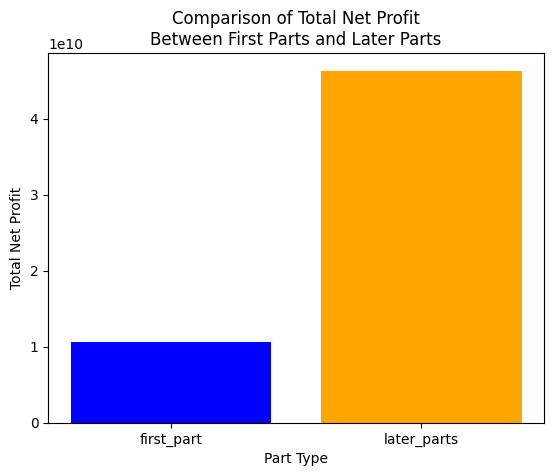

In [40]:

first_release = df_sorted.groupby('title')['release_year'].min().reset_index()
first_release = first_release.rename(columns={'release_year': 'first_year'})

df_merged = pd.merge(df_sorted, first_release, on='title')

df_merged['part_type'] = df_merged.apply(lambda row: 'first_part' if row['release_year'] == row['first_year'] else 'later_parts', axis=1)


multi_parts_titles = parts_with_multiple_years['title'].tolist()
df_multi = df_merged[df_merged['title'].isin(multi_parts_titles)]

profit_summary = df_multi.groupby('part_type')['profit'].sum().reset_index()

plt.bar(profit_summary['part_type'], profit_summary['profit'], color=['blue', 'orange'])
plt.title('Comparison of Total Net Profit\nBetween First Parts and Later Parts')
plt.xlabel('Part Type')
plt.ylabel('Total Net Profit')
plt.show()


## im ML : بدي جرب ل 2

In [41]:
# هي داتا نهائية بس مع كل انواع الافلام
len(english_movies)

45212

In [42]:
#هي داتا مافيا انواع  يلي اقل من 2 فيلم لكل نوع 
len(english_movies2)

41399

In [53]:
english_movies.columns

Index(['id', 'title', 'genres', 'original_language', 'overview', 'popularity',
       'production_companies', 'release_date', 'budget', 'revenue', 'runtime',
       'status', 'tagline', 'vote_average', 'vote_count', 'credits', 'profit',
       'release_year', 'release_month', 'release_day', 'unique_actors_count',
       'tagline_sentiment'],
      dtype='object')